Con esto se podra correr el modelo para predecir las fotos! (el modelo ya ha sido entrenado usando el codigo de "Codigo de entrenamiento.ipynb")

2025-06-08 19:44:27.916726: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-08 19:44:27.947235: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 19:44:28.222729: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-08 19:44:28.378481: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749411868.675511   12541 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749411868.77

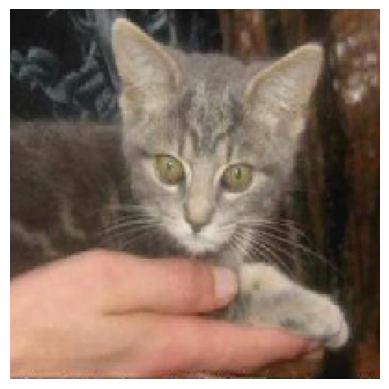

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step
cat
Raw output: [[0.99772245 0.00227755]]


In [1]:
# Your code here
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

saved_model = load_model("../models/best_model.keras")
img = image.load_img("../data/raw/test1/224.jpg", target_size=(200, 200), color_mode="rgb")
img = np.asarray(img) / 255.0  # <- ¡IMPORTANTE! Normalizar igual que durante entrenamiento
plt.imshow(img)
plt.axis("off")
plt.show()

img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)

predicted_class = np.argmax(output)
if predicted_class == 0:
    print("cat")
elif predicted_class == 1:
    print("dog")
else:
    print("Unknown class")

print("Raw output:", output)